# Warps

`nleg1d` implements warping functionality through `Warp1D` objects. A `Warp1D` object contains a single warp function, along with various attributes, properies and methods for working with that warp function. Multiple warps are stored in the `Warp1DList` class which, as the class name suggests, is simply a custom list containing `Warp1D` objects.

Let's first consider a single warp object and its key functionality.

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import nlreg1d as nl

### Create and apply random warps

<class 'nlreg1d.warp.Warp1D'>


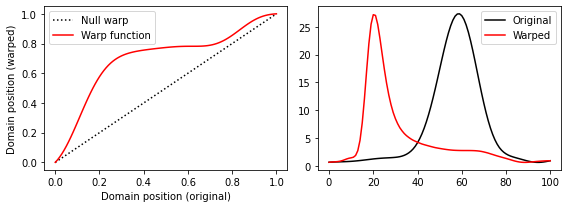

In [59]:
# load a dataset and extract a single observation (see the Datasets notebook)
dataset = nl.data.SimulatedA()
y       = dataset.dv[8]        # single DV observation

# generate a random warp:
np.random.seed(123456789)
w       = nl.random_warp( as_warp_object=True )
print( type(w) )

# apply warp:
yw      = w.apply(y)

# plot:
fig,axs = plt.subplots(1, 2, figsize=(8,3))
ax0,ax1 = axs
ax0.plot( [0,1], [0,1], color='k', ls=':', label='Null warp')
w.plot(ax=ax0, color='r', label='Warp function')
ax0.set_xlabel('Domain position (original)')
ax0.set_ylabel('Domain position (warped)')
ax0.legend()

ax1.plot(y,  'k', label='Original')
ax1.plot(yw, 'r', label='Warped')
ax1.legend()
plt.tight_layout()

plt.show()



The warp function can be accessed as an array using the `w` attribute:

<class 'numpy.ndarray'>
(101,)


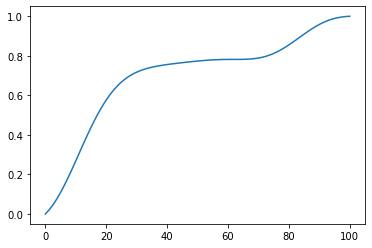

In [60]:
a    = w.w
print( type(a) )
print( a.shape )

ax   = plt.axes()
ax.plot(a)
plt.show()

### Calculate and apply inverse warp

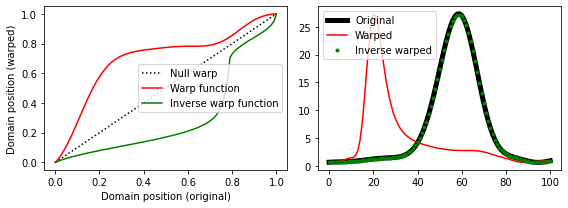

In [61]:
# calculate and apply inverse:
wi    = w.get_inverse( as_warp_object=True )
ywi   = wi.apply( yw )


# plot:
fig,axs = plt.subplots(1, 2, figsize=(8,3))
ax0,ax1 = axs
ax0.plot( [0,1], [0,1], color='k', ls=':', label='Null warp')
w.plot(ax=ax0,  color='r', label='Warp function')
wi.plot(ax=ax0, color='g', label='Inverse warp function')
ax0.set_xlabel('Domain position (original)')
ax0.set_ylabel('Domain position (warped)')
ax0.legend()

ax1.plot(y,   'k', label='Original', lw=5)
ax1.plot(yw,  'r', label='Warped')
ax1.plot(ywi, 'g.', label='Inverse warped')
ax1.legend()
plt.tight_layout()

plt.show()


### Alternative warp function variables

Two alternative expressions of warp functions are available:

- Deviation (from linear time)
- Displacement field (domain point displacements)

These can be obtained using the `get_deviation_from_linear_time` or `get_displacement_field` methods as follows:

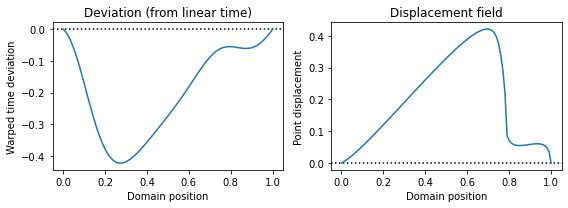

In [62]:

d0  = w.get_deviation_from_linear_time()
d1  = w.get_displacement_field()


# plot:
fig,axs = plt.subplots(1, 2, figsize=(8,3))
ax0,ax1 = axs
q       = np.linspace(0, 1, d0.size)
[ax.axhline(0, color='k', ls=':')  for ax in axs]
ax0.plot( q, d0 )
ax1.plot( q, d1 )

ax0.set_title('Deviation (from linear time)')
ax0.set_xlabel('Domain position')
ax0.set_ylabel('Warped time deviation')

ax1.set_title('Displacement field')
ax1.set_xlabel('Domain position')
ax1.set_ylabel('Point displacement')




plt.tight_layout()
plt.show()